<a href="https://colab.research.google.com/github/tomorn112/ZC-DINO-ER/blob/part1/duckeggGSAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zero-Shot Eggshell Crack Detection Using Grounding DINO and FFT-Based Outer-to-Inner Ring Energy Ratio**
### This repository contains the supplementary code for the journal submitted to IEEE Access (2025) titled: "Zero-Shot Eggshell Crack Detection Using Grounding DINO and FFT-Based Outer-to-Inner Ring Energy Ratio".
# **Part: 1 Cropped and Removed Background using GroundedSAM**
###This section provides the implementation for preprocessing eggshell images by cropping and removing backgrounds using GroundedSAM. The processed images serve as input for the subsequent zero-shot crack detection pipeline.
##Features:
###GroundedSAM-based segmentation: Automatically detects and removes image backgrounds.
###Preprocessing pipeline: Prepares images for further analysis using FFT-based feature extraction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Feb 27 04:36:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!python --version

Python 3.11.11


In [ ]:
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
supervision==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/images

In [ ]:
import supervision as sv
import os

# Define directories for images
IMAGE_DIR_PATH = "/content/drive/My Drive/IEEE_Access/Egg/test_ref1"
crack_dir = os.path.join(IMAGE_DIR_PATH, "train/train739/crack/")
intact_dir = os.path.join(IMAGE_DIR_PATH, "train/train739/intact/")

# Get image paths from both directories
crack_images = sv.list_files_with_extensions(directory=crack_dir, extensions=["png", "jpg", "jpeg"])
intact_images = sv.list_files_with_extensions(directory=intact_dir, extensions=["png", "jpg", "jpeg"])

# Combine both lists
image_paths = crack_images + intact_images

# Print total image count
print('Image count:', len(image_paths))

# Define sample settings for visualization
SAMPLE_SIZE = 16  # Number of images to sample
SAMPLE_GRID_SIZE = (4, 4)  # Grid layout for visualization
SAMPLE_PLOT_SIZE = (16, 16)  # Figure size for the plot



Image count: 739


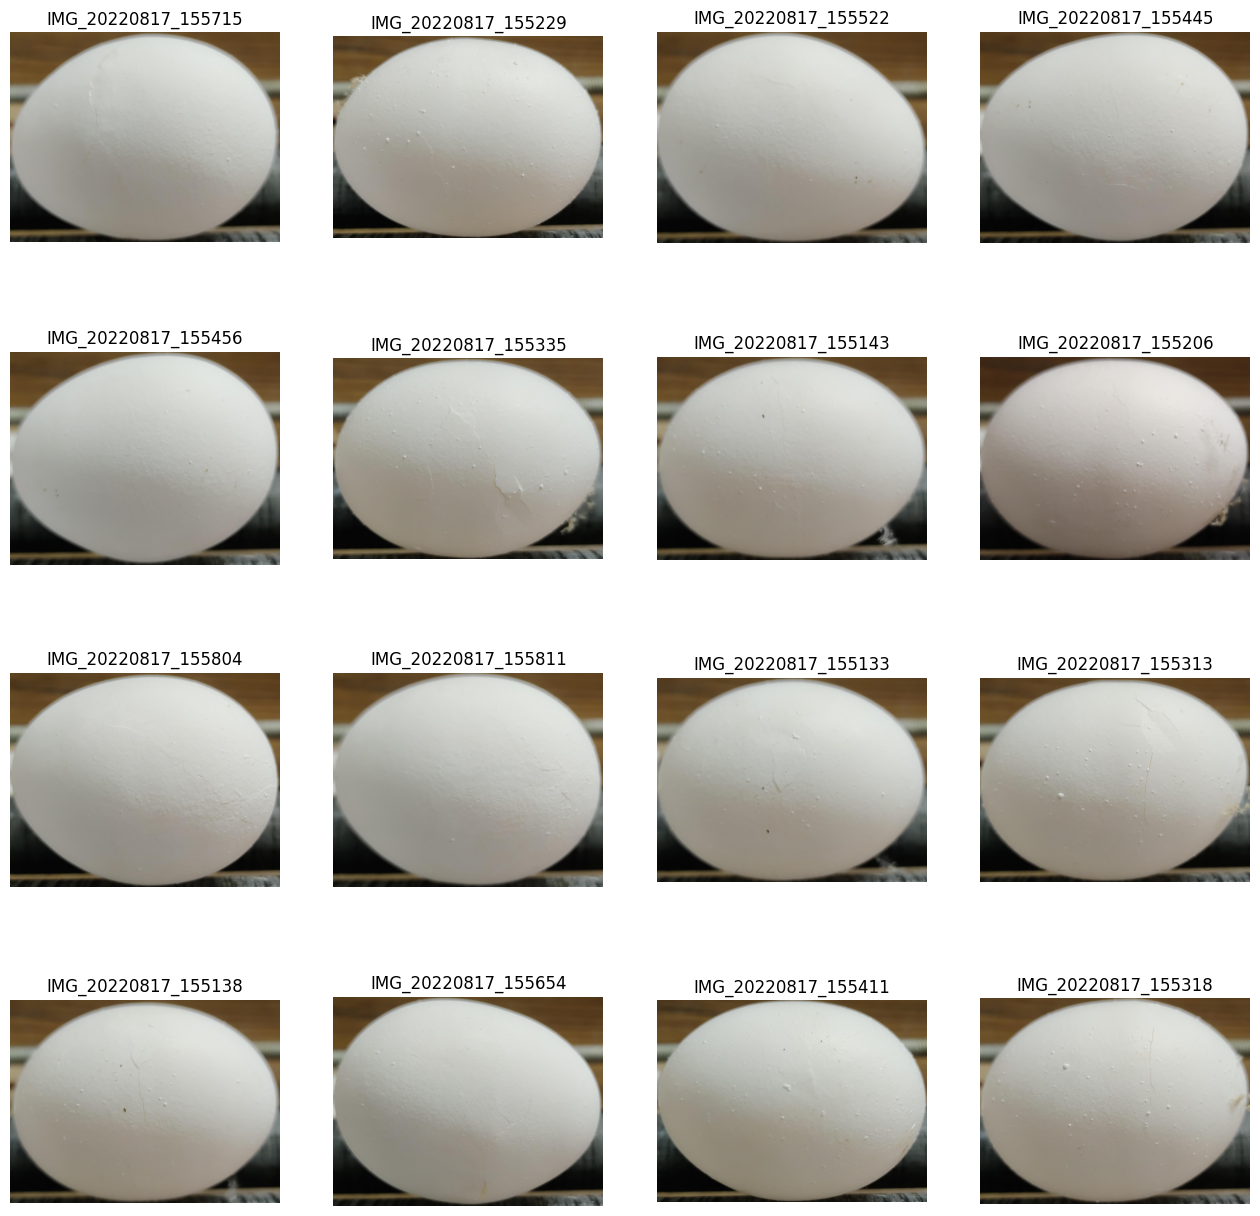

In [ ]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

In [ ]:
!pip install roboflow

In [ ]:
!pip show roboflow

Name: roboflow
Version: 1.1.54
Summary: Official Python package for working with the Roboflow API
Home-page: https://github.com/roboflow-ai/roboflow-python
Author: Roboflow
Author-email: support@roboflow.com
License: UNKNOWN
Location: /usr/local/lib/python3.11/dist-packages
Requires: certifi, cycler, filetype, idna, kiwisolver, matplotlib, numpy, opencv-python-headless, Pillow, python-dateutil, python-dotenv, PyYAML, requests, requests-toolbelt, six, tqdm, urllib3
Required-by: autodistill-florence-2, autodistill_grounded_sam_2


In [ ]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({"egg": "egg"})

In [ ]:
DATASET_DIR_PATH = f"{HOME}/dataset5"

In [ ]:
import os
import cv2
import torch
import random
import supervision as sv
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from pathlib import Path

# ✅ Define directories for images
IMAGE_DIR_PATH = "/content/drive/My Drive/IEEE_Access/Egg/test_ref1"
crack_dir = os.path.join(IMAGE_DIR_PATH, "train/train739/crack/")
intact_dir = os.path.join(IMAGE_DIR_PATH, "train/train739/intact/")

# ✅ Define dataset output paths
DATASET_DIR_PATH = "/content/dataset5"
IMAGES_OUTPUT_DIR = os.path.join(DATASET_DIR_PATH, "train/images")
LABELS_OUTPUT_DIR = os.path.join(DATASET_DIR_PATH, "train/labels")
DATA_YAML_PATH = os.path.join(DATASET_DIR_PATH, "data.yaml")

# ✅ Ensure dataset directories exist
Path(DATASET_DIR_PATH).mkdir(parents=True, exist_ok=True)
Path(IMAGES_OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
Path(LABELS_OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# ✅ Load GroundedSAM model with ontology
ontology = CaptionOntology({"egg": "object"})

try:
    base_model = GroundedSAM(ontology=ontology)
    print("✅ GroundedSAM model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading GroundedSAM: {e}")
    exit()

# ✅ Get image paths from both directories
def get_sample_images(directory, num_samples):
    """Get a random sample of images from a directory."""
    images = [
        os.path.join(directory, img)
        for img in sorted(os.listdir(directory))
        if img.lower().endswith((".jpg", ".jpeg", ".png"))
    ]
    return random.sample(images, min(num_samples, len(images)))

# ✅ Select 8 images from each category
SAMPLE_SIZE = 16  # Total number of images to test
crack_sample = get_sample_images(crack_dir, 8)
intact_sample = get_sample_images(intact_dir, 8)
image_paths = crack_sample + intact_sample  # Combine into one list

print(f"📂 Selected {len(image_paths)} images (8 crack + 8 intact) for testing")

# ✅ Process images and save labels in YOLO format
for i, image_full_path in enumerate(image_paths):
    image_name = os.path.basename(image_full_path)
    print(f"📸 Processing: {image_full_path}")

    # ✅ Free up GPU memory before each image
    torch.cuda.empty_cache()

    # ✅ Predict bounding boxes
    results = base_model.predict(image_full_path)

    # ✅ Extract detections from tuple if necessary
    if isinstance(results, tuple):
        results = results[0]  # Extract only the detections

    # ✅ Check if valid results exist
    if not hasattr(results, "xyxy") or len(results.xyxy) == 0:
        print(f"❌ No valid bounding boxes detected in {image_name}, skipping...")
        continue

    # ✅ Apply Non-Maximum Suppression (NMS)
    results = results.with_nms()

    # ✅ Load the image
    image = cv2.imread(image_full_path)
    if image is None:
        print(f"❌ Failed to load {image_name}, skipping...")
        continue

    h, w, _ = image.shape  # Get image dimensions

    # ✅ Annotate the image with bounding boxes
    box_annotator = sv.BoxAnnotator()
    annotated_image = box_annotator.annotate(image.copy(), detections=results)

    # ✅ Save processed image
    output_filename = os.path.basename(image_name)
    output_image_path = os.path.join(IMAGES_OUTPUT_DIR, output_filename)
    cv2.imwrite(output_image_path, annotated_image)

    # ✅ Save YOLO label file
    label_filename = os.path.splitext(output_filename)[0] + ".txt"
    label_output_path = os.path.join(LABELS_OUTPUT_DIR, label_filename)

    with open(label_output_path, "w") as label_file:
        for result in results.xyxy:  # Extract bounding box coordinates
            x_min, y_min, x_max, y_max = result[:4]  # Extract bbox coords
            x_center = (x_min + x_max) / 2 / w
            y_center = (y_min + y_max) / 2 / h
            bbox_width = (x_max - x_min) / w
            bbox_height = (y_max - y_min) / h
            label_file.write(f"0 {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

    print(f"✅ Processed {image_name} with {len(results.xyxy)} detections")

# ✅ Create data.yaml file for YOLO dataset
with open(DATA_YAML_PATH, "w") as yaml_file:
    yaml_file.write(f"path: {DATASET_DIR_PATH}\n")
    yaml_file.write("train: train/images\n")
    yaml_file.write("val: train/images\n")  # Using same images for validation (change if needed)
    yaml_file.write("nc: 1\n")  # Number of classes
    yaml_file.write("names: ['egg']\n")

print("✅ Dataset processing and labeling completed successfully!")


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
✅ GroundedSAM model loaded successfully!
📂 Selected 16 images (8 crack + 8 intact) for testing
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220817_152057.jpg
✅ Processed IMG_20220817_152057.jpg with 1 detections
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220817_150235.jpg
✅ Processed IMG_20220817_150235.jpg with 1 detections
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220812_103155.jpg
✅ Processed IMG_20220812_103155.jpg with 1 detections
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220817_152542.jpg
✅ Processed IMG_20220817_152542.jpg with 1 detections
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220816_145442.jpg
✅ Processed IMG_20220816_145442.jpg with 1 detections
📸 Proces

# Testing for Memory Use, GPU-CPU Performance, and Parameter Count with Latency Analysis

In [ ]:
import os
import cv2
import torch
import time
import random
import supervision as sv
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from pathlib import Path

# ✅ Define input directories
IMAGE_DIR_PATH = "/content/drive/My Drive/IEEE_Access/Egg/test_ref1"
crack_dir = os.path.join(IMAGE_DIR_PATH, "train/train739/crack/")
intact_dir = os.path.join(IMAGE_DIR_PATH, "train/train739/intact/")

# ✅ Define dataset output paths
DATASET_DIR_PATH = "./dataset5"
IMAGES_OUTPUT_DIR = os.path.join(DATASET_DIR_PATH, "train/images")
LABELS_OUTPUT_DIR = os.path.join(DATASET_DIR_PATH, "train/labels")
DATA_YAML_PATH = os.path.join(DATASET_DIR_PATH, "data.yaml")

# ✅ Ensure dataset directories exist
Path(DATASET_DIR_PATH).mkdir(parents=True, exist_ok=True)
Path(IMAGES_OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
Path(LABELS_OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

# ✅ Load GroundedSAM model with ontology
ontology = CaptionOntology({"egg": "object"})
device = 'cuda' if torch.cuda.is_available() else 'cpu'
base_model = GroundedSAM(ontology=ontology)

# ✅ Move model to GPU if available
if hasattr(base_model.grounding_dino_model, 'model') and isinstance(base_model.grounding_dino_model.model, torch.nn.Module):
    base_model.grounding_dino_model.model.to(device)

# ✅ Count model parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

parameter_count = 0
if hasattr(base_model.grounding_dino_model, 'model') and isinstance(base_model.grounding_dino_model.model, torch.nn.Module):
    parameter_count = count_parameters(base_model.grounding_dino_model.model)
    print(f"🔍 GroundedSAM Model Parameter Count: {parameter_count}")

# ✅ Select a sample of 16 images (8 from crack, 8 from intact)
def get_sample_images(directory, num_samples):
    images = [
        os.path.join(directory, img)
        for img in sorted(os.listdir(directory))
        if img.lower().endswith((".jpg", ".jpeg", ".png"))
    ]
    return random.sample(images, min(num_samples, len(images)))

SAMPLE_SIZE = 16  # Total number of images to test
crack_sample = get_sample_images(crack_dir, 8)
intact_sample = get_sample_images(intact_dir, 8)
image_paths = crack_sample + intact_sample  # Combine into one list

print(f"📂 Selected {len(image_paths)} images (8 crack + 8 intact) for testing")

# ✅ Initialize performance metrics
latencies = []
inference_speeds = []
memory_usages = []

# ✅ Process selected images and save labels in YOLO format
for i, image_full_path in enumerate(image_paths):
    image_name = os.path.basename(image_full_path)
    print(f"📸 Processing: {image_full_path}")

    # ✅ Free up GPU memory before processing
    if device == 'cuda':
        torch.cuda.empty_cache()

    # ✅ Measure inference time
    start_time = time.time()
    results = base_model.predict(image_full_path)
    latency = time.time() - start_time
    latencies.append(latency)

    # ✅ Measure GPU memory usage (if applicable)
    if device == 'cuda':
        memory_usage = torch.cuda.memory_allocated() / (1024 ** 2)  # Convert to MB
        memory_usages.append(memory_usage)

    # ✅ Calculate FPS
    fps = 1 / latency if latency > 0 else 0
    inference_speeds.append(fps)

    # ✅ Extract detections from tuple if necessary
    if isinstance(results, tuple):
        results = results[0]  # Extract only the detections

    if not hasattr(results, "xyxy") or len(results.xyxy) == 0:
        print(f"❌ No valid bounding boxes detected in {image_name}, skipping...")
        continue

    # ✅ Apply Non-Maximum Suppression (NMS)
    results = results.with_nms()

    # ✅ Load the image
    image = cv2.imread(image_full_path)
    if image is None:
        print(f"❌ Failed to load {image_name}, skipping...")
        continue

    h, w, _ = image.shape  # Get image dimensions

    # ✅ Annotate the image
    box_annotator = sv.BoxAnnotator()
    annotated_image = box_annotator.annotate(image.copy(), detections=results)

    # ✅ Save processed image
    output_filename = os.path.basename(image_name)
    output_image_path = os.path.join(IMAGES_OUTPUT_DIR, output_filename)
    cv2.imwrite(output_image_path, annotated_image)

    # ✅ Save YOLO label file
    label_filename = os.path.splitext(output_filename)[0] + ".txt"
    label_output_path = os.path.join(LABELS_OUTPUT_DIR, label_filename)

    with open(label_output_path, "w") as label_file:
        for result in results.xyxy:
            x_min, y_min, x_max, y_max = result[:4]
            x_center = (x_min + x_max) / 2 / w
            y_center = (y_min + y_max) / 2 / h
            bbox_width = (x_max - x_min) / w
            bbox_height = (y_max - y_min) / h
            label_file.write(f"0 {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

    print(f"✅ Processed {image_name} with {len(results.xyxy)} detections. Latency: {latency:.4f}s, FPS: {fps:.2f}")

# ✅ Display performance summary
print("\n================ Performance Summary ================")
print(f"Device Used: {device}")
print(f"GroundedSAM Model Parameter Count: {parameter_count}")
print(f"Average Latency: {sum(latencies)/len(latencies):.4f} sec")
print(f"Average FPS: {sum(inference_speeds)/len(inference_speeds):.2f}")
if device == 'cuda':
    print(f"Average GPU Memory Usage: {sum(memory_usages)/len(memory_usages):.2f} MB")
print("===================================================\n")


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased
🔍 GroundedSAM Model Parameter Count: 172249090
📂 Selected 16 images (8 crack + 8 intact) for testing
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220817_154953.jpg
✅ Processed IMG_20220817_154953.jpg with 1 detections. Latency: 2.4549s, FPS: 0.41
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220816_144159.jpg
✅ Processed IMG_20220816_144159.jpg with 1 detections. Latency: 2.4274s, FPS: 0.41
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220816_144607.jpg
✅ Processed IMG_20220816_144607.jpg with 1 detections. Latency: 2.4595s, FPS: 0.41
📸 Processing: /content/drive/My Drive/IEEE_Access/Egg/test_ref1/train/train739/crack/IMG_20220816_143154.jpg
✅ Processed IMG_20220816_143154.jpg with 1 detections. Latency: 2.4710s, FPS: 0.40
📸 Processing: /content/drive/My Drive/IEEE_Access

In [ ]:
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/dataset5/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/dataset5/train/images"
DATA_YAML_PATH = f"{HOME}/dataset5/data.yaml"

In [ ]:
import supervision as sv
import os

# ✅ Update the correct dataset path
DATASET_DIR_PATH = "/content/dataset5"
IMAGES_DIRECTORY_PATH = os.path.join(DATASET_DIR_PATH, "train/images")
ANNOTATIONS_DIRECTORY_PATH = os.path.join(DATASET_DIR_PATH, "train/labels")
DATA_YAML_PATH = os.path.join(DATASET_DIR_PATH, "data.yaml")

# ✅ Ensure data.yaml exists
if not os.path.exists(DATA_YAML_PATH):
    raise FileNotFoundError(f"❌ Error: data.yaml not found at {DATA_YAML_PATH}")

# ✅ Load dataset using correct paths
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH
)

print(f"✅ Dataset successfully loaded! Total images: {len(dataset)}")


✅ Dataset successfully loaded! Total images: 35


In [ ]:
import yaml

DATA_YAML_PATH = "/content/dataset5/data.yaml"

with open(DATA_YAML_PATH, "r") as yaml_file:
    data_yaml = yaml.safe_load(yaml_file)

print("🔍 Manually loaded `data.yaml` content:", data_yaml)

# ✅ Ensure `names` key exists
if "names" in data_yaml and isinstance(data_yaml["names"], list):
    print(f"✅ Class Names Found: {data_yaml['names']}")
else:
    print("❌ Error: `names` key is missing or incorrectly formatted in data.yaml!")


🔍 Manually loaded `data.yaml` content: {'path': '/content/dataset5', 'train': 'train/images', 'val': 'train/images', 'nc': 1, 'names': ['egg']}
✅ Class Names Found: ['egg']


In [ ]:
import supervision as sv

DATASET_DIR_PATH = "/content/dataset5"
IMAGES_DIRECTORY_PATH = os.path.join(DATASET_DIR_PATH, "train/images")
ANNOTATIONS_DIRECTORY_PATH = os.path.join(DATASET_DIR_PATH, "train/labels")
DATA_YAML_PATH = os.path.join(DATASET_DIR_PATH, "data.yaml")

# ✅ Manually load data.yaml
with open(DATA_YAML_PATH, "r") as yaml_file:
    data_yaml = yaml.safe_load(yaml_file)

# ✅ Manually set class names if supervision doesn't load them
class_names = data_yaml.get("names", [])
if not class_names:
    raise ValueError("❌ No class names found in data.yaml!")

# ✅ Reload dataset with class names
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH
)

# ✅ Manually assign class names if missing
if not dataset.classes:
    dataset.classes = class_names

print(f"✅ Classes Loaded After Manual Assignment: {dataset.classes}")  # Should print ['egg']


✅ Classes Loaded After Manual Assignment: ['egg']


In [ ]:
# Print 5 samples to verify YOLO labels are being read
for image_name in list(dataset.images.keys())[:5]:
    annotations = dataset.annotations[image_name]
    print(f"📄 {image_name}: Class IDs → {annotations.class_id}")


📄 IMG_20220816_145442.jpg: Class IDs → [0]
📄 IMG_20220812_103314.jpg: Class IDs → [0]
📄 IMG_20220812_103339.jpg: Class IDs → [0]
📄 IMG_20220817_152057.jpg: Class IDs → [0]
📄 IMG_20220812_103809.jpg: Class IDs → [0]


In [ ]:
# ✅ Force dataset.classes to manually load from data.yaml
dataset.classes = class_names
print(f"✅ Final Fix: Classes Loaded → {dataset.classes}")  # Should print ['egg']


✅ Final Fix: Classes Loaded → ['egg']


# Visualizing the Labelled Dataset : Bounding Box

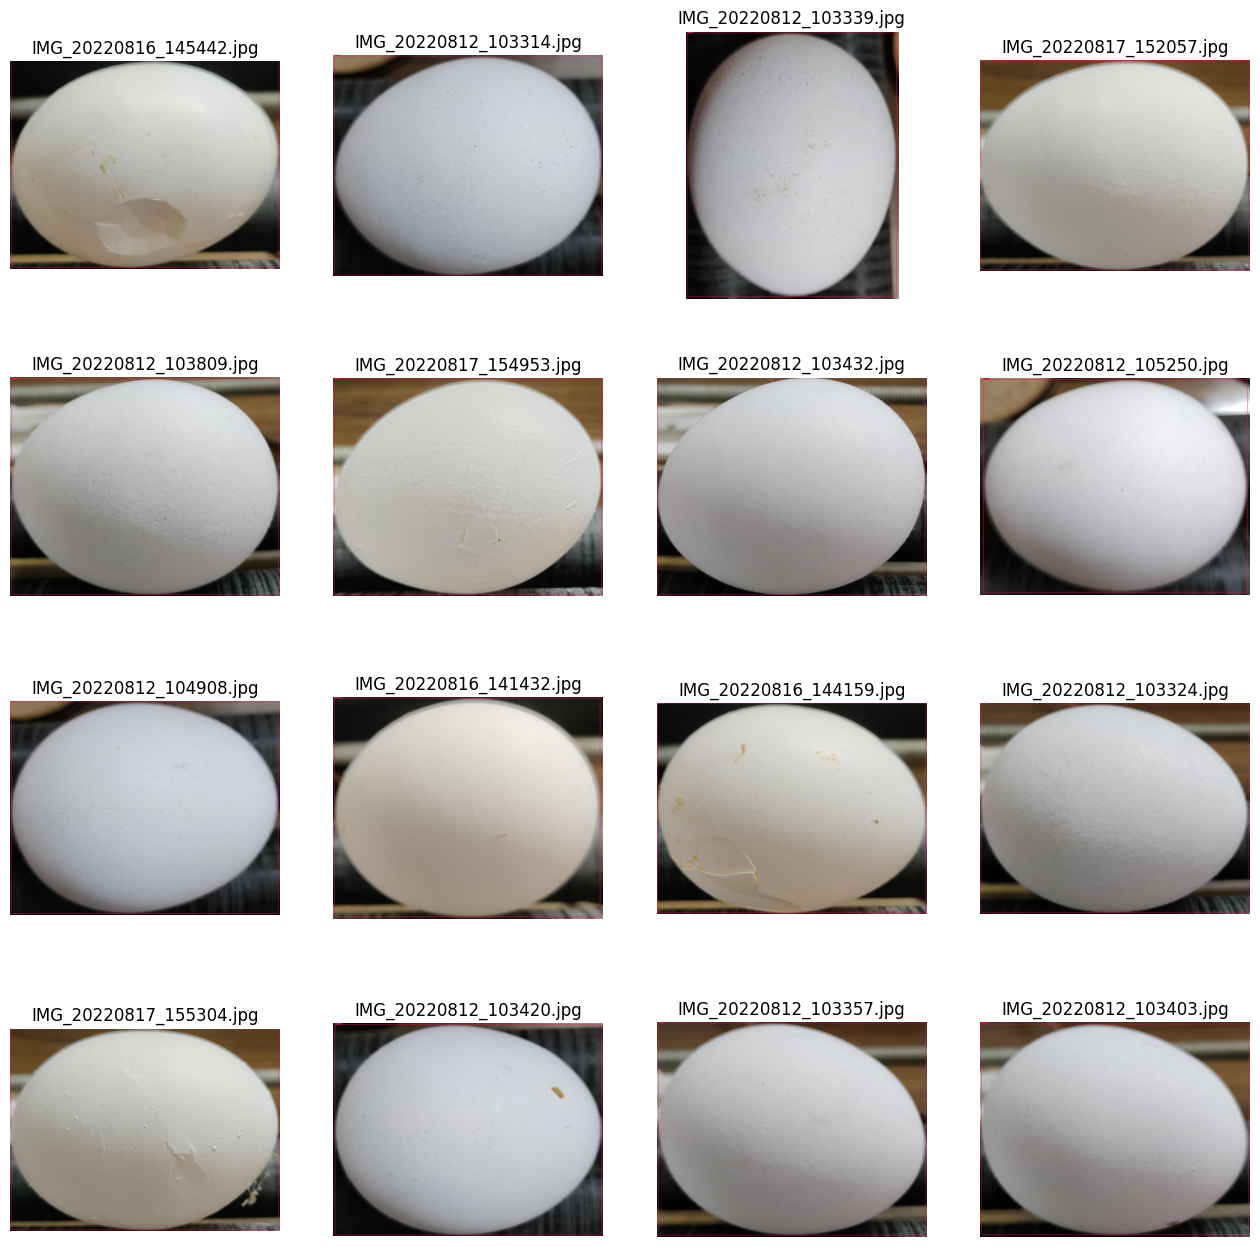

In [ ]:
import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)

    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)

# Visualizing the Labelled Dataset : Masking

✅ Mask found for IMG_20220816_145442.jpg
✅ Mask found for IMG_20220812_103314.jpg
✅ Mask found for IMG_20220812_103339.jpg
✅ Mask found for IMG_20220817_152057.jpg
✅ Mask found for IMG_20220812_103809.jpg
✅ Mask found for IMG_20220817_154953.jpg
✅ Mask found for IMG_20220812_103432.jpg
✅ Mask found for IMG_20220812_105250.jpg
✅ Mask found for IMG_20220812_104908.jpg


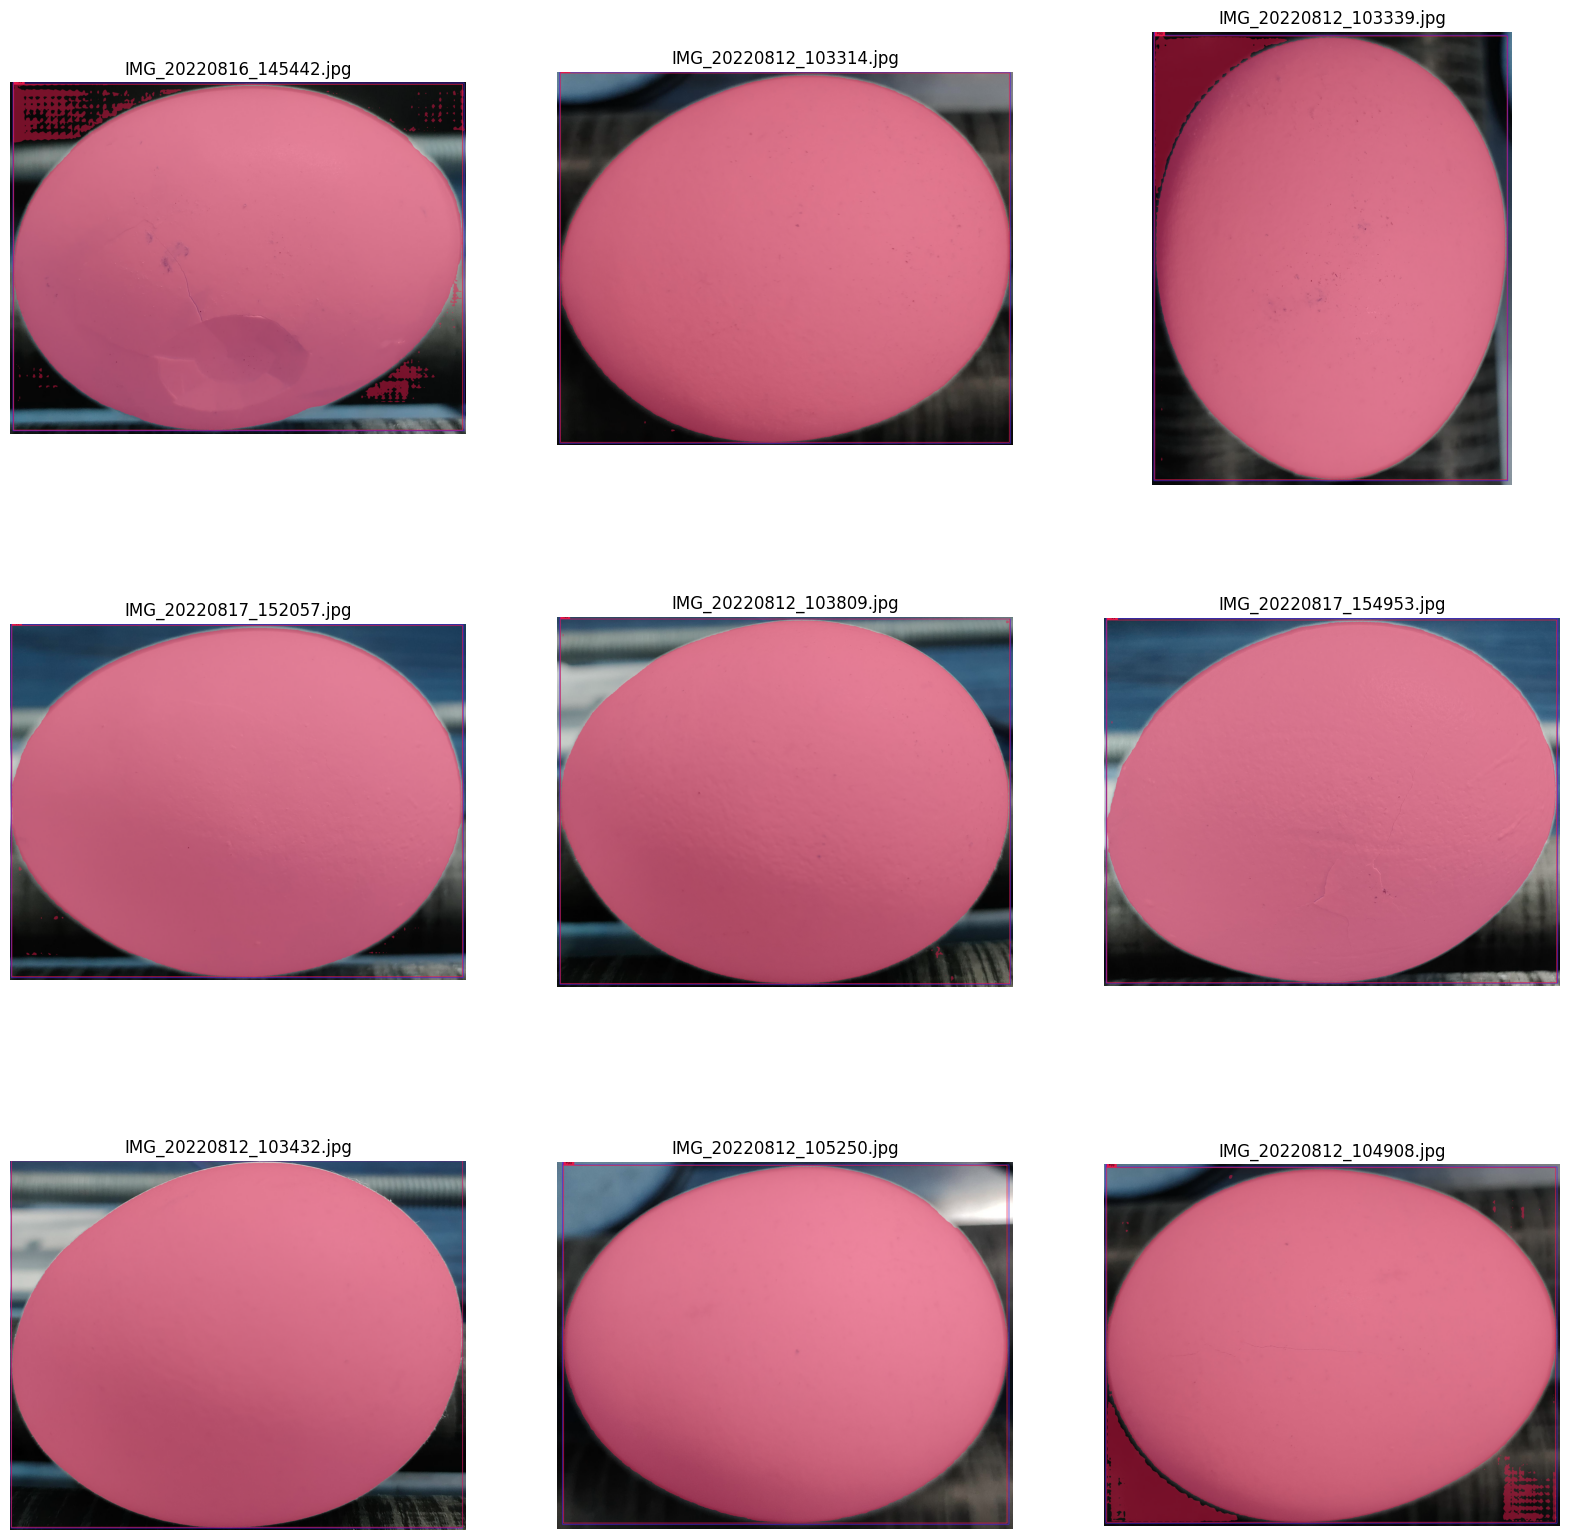

In [ ]:
import os
import matplotlib.pyplot as plt
import supervision as sv

# ✅ Define parameters for visualization
SAMPLE_SIZE = 9
SAMPLE_GRID_SIZE = (3, 3)
SAMPLE_PLOT_SIZE = (20, 20)

# ✅ Get all image names
image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

# ✅ Create annotators
mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    # ✅ Construct full image path
    image_path = os.path.join("/content/dataset5/train/images", image_name)
    image = plt.imread(image_path)

    # ✅ Get results directly from Grounded SAM, using the full path
    results = base_model.predict(image_path)

    # ✅ Ensure masks exist
    if hasattr(results, "mask") and results.mask is not None:
        print(f"✅ Mask found for {image_name}")
    else:
        print(f"❌ No mask found for {image_name}, skipping...")
        continue  # Skip images without masks

    # ✅ Get class labels
    labels = [
        dataset.classes[class_id] if dataset.classes else "Object"
        for class_id in results.class_id
    ]

    # ✅ Apply mask & bounding box annotations
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=results)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=results, labels=labels)

    images.append(annotated_image)

# ✅ Display images in a grid
sv.plot_images_grid(images=images, titles=image_names, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)


# Mask, Crop and Save

✅ Saved: /content/no_background_mask/maskegg_0_0.jpg
✅ Saved: /content/no_background_mask/maskegg_1_0.jpg
✅ Saved: /content/no_background_mask/maskegg_2_0.jpg
✅ Saved: /content/no_background_mask/maskegg_3_0.jpg
✅ Saved: /content/no_background_mask/maskegg_4_0.jpg
✅ Saved: /content/no_background_mask/maskegg_5_0.jpg
✅ Saved: /content/no_background_mask/maskegg_6_0.jpg
✅ Saved: /content/no_background_mask/maskegg_7_0.jpg
✅ Saved: /content/no_background_mask/maskegg_8_0.jpg
✅ Saved: /content/no_background_mask/maskegg_9_0.jpg


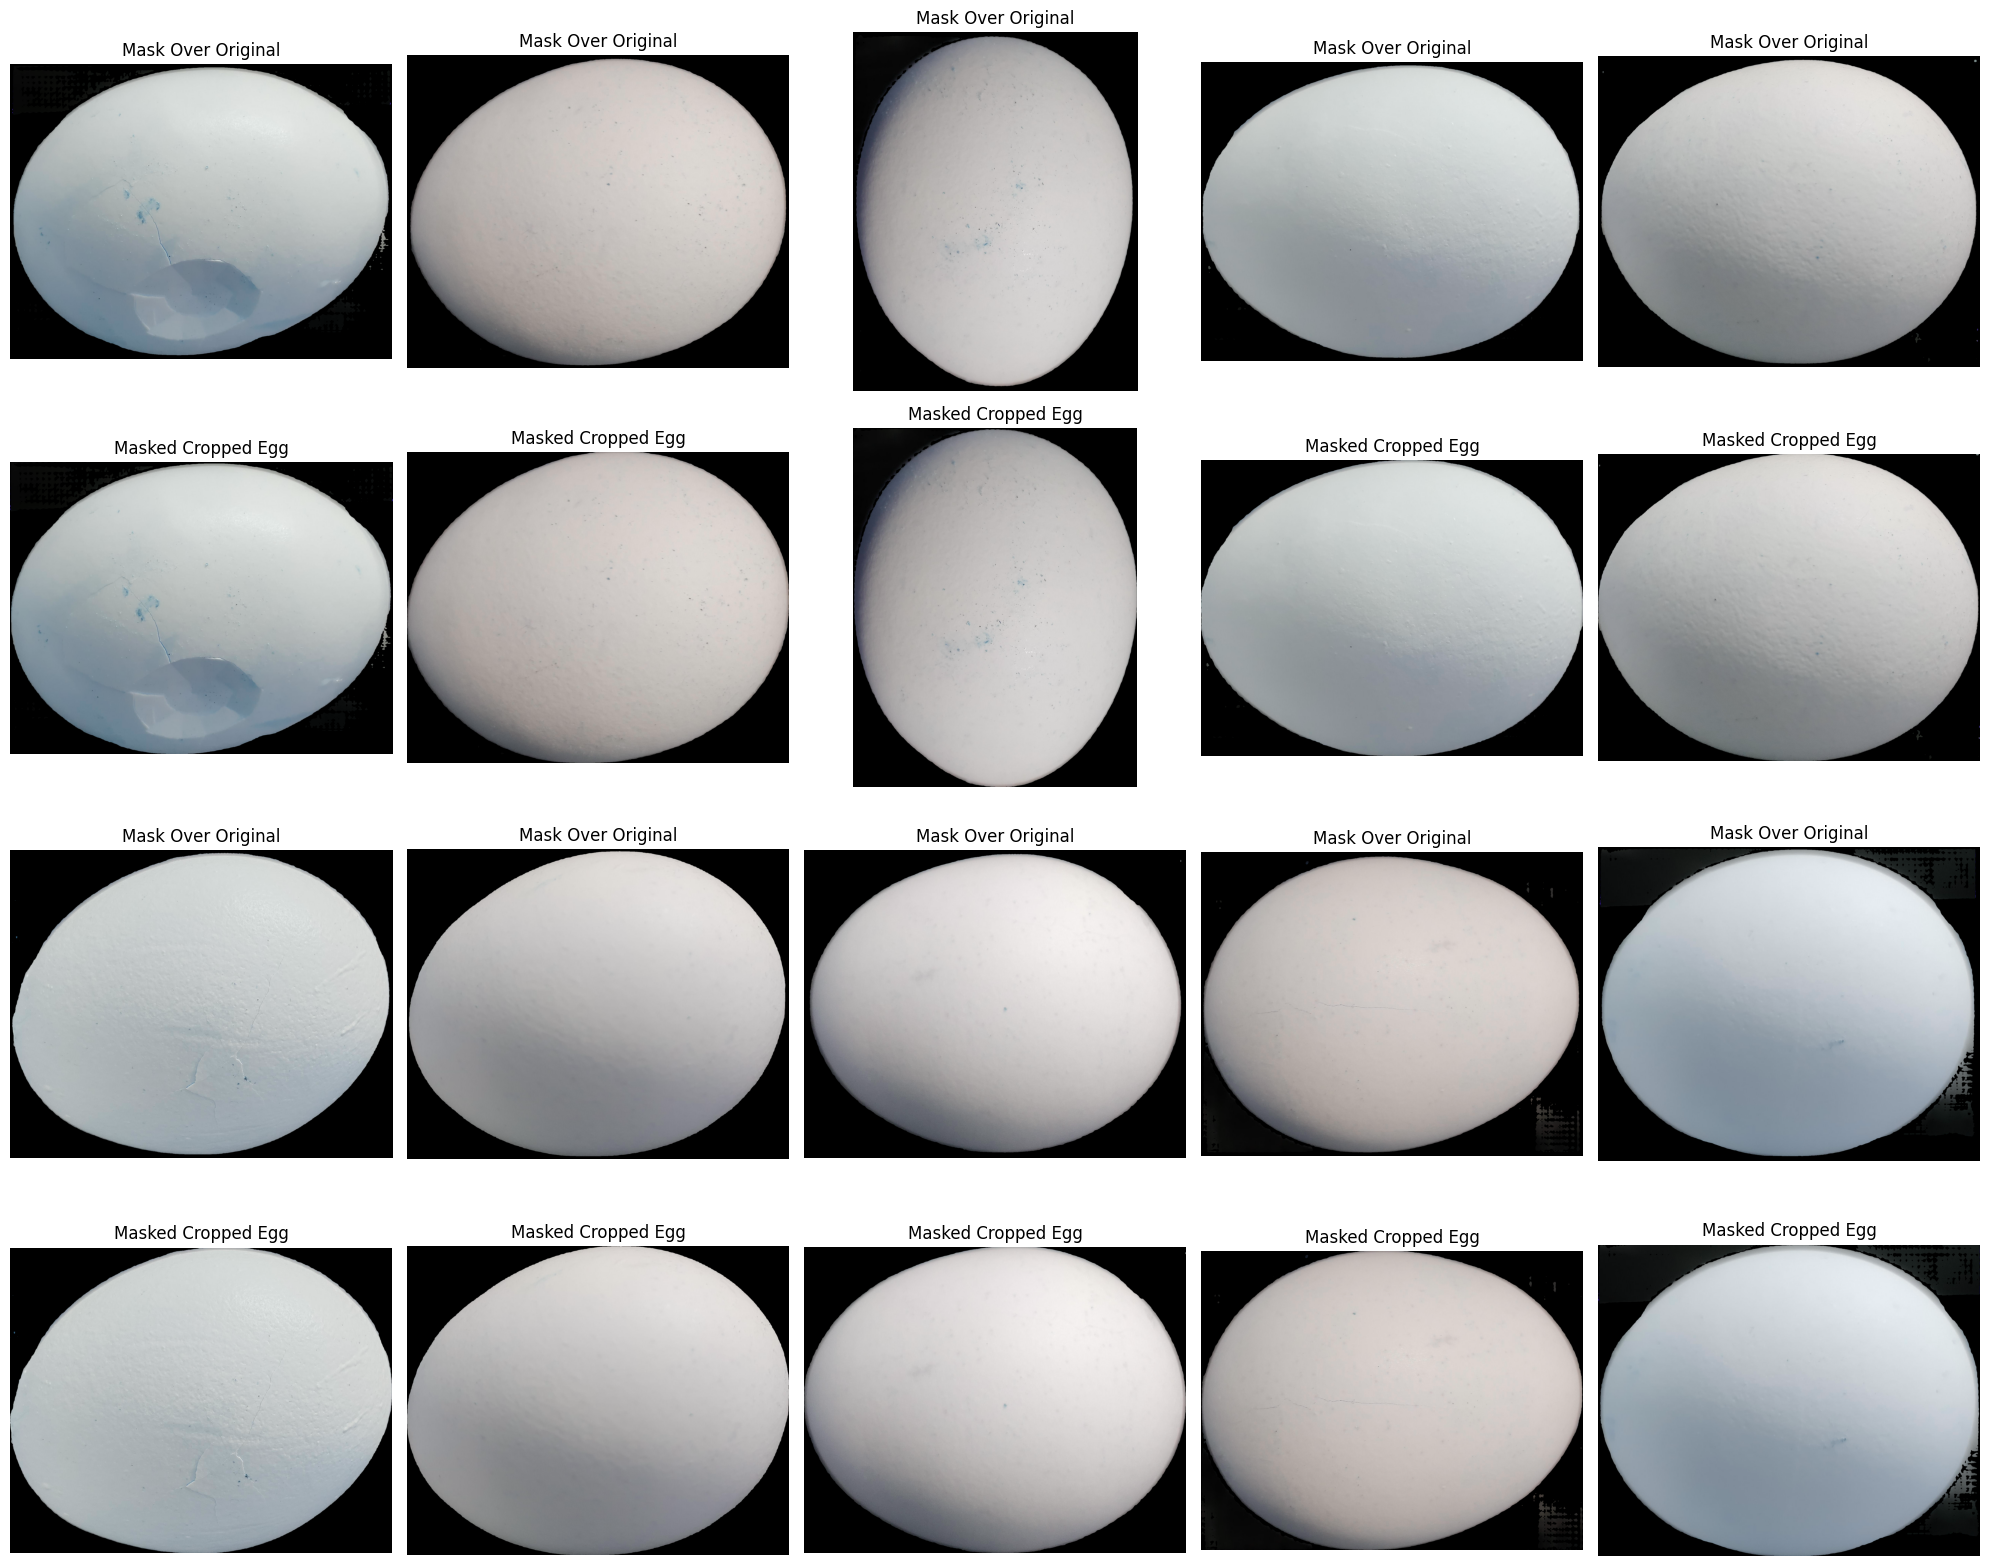

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ✅ Define parameters
SAMPLE_SIZE = 10  # Number of images to process
IMAGE_DIR = "/content/dataset5/train/images"  # Path to dataset images
OUTPUT_DIR = "/content/no_background_mask/"  # Output directory for cropped images
os.makedirs(OUTPUT_DIR, exist_ok=True)  # Ensure output directory exists

# ✅ Get the first image name
image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

# ✅ Store processed images
mask_over_original = []
mask_over_cropped = []

for i, image_name in enumerate(image_names):
    # ✅ Construct full image path
    image_path = os.path.join(IMAGE_DIR, image_name)
    image = plt.imread(image_path)  # Load image

    # ✅ Get fresh results from Grounded SAM (ensures masks are available)
    results = base_model.predict(image_path)

    # ✅ Ensure detections exist
    if len(results) == 0:
        print(f"⚠️ No detections found for {image_name}, skipping...")
        continue

    # ✅ Ensure masks exist
    if not hasattr(results, "mask") or results.mask is None:
        print(f"❌ No mask found for {image_name}, skipping...")
        continue

    # ✅ Convert image to RGB format
    imageRGB = image[..., ::-1]

    # ✅ Process each mask (limit to 20 for visualization)
    for j, mask in enumerate(results.mask):
        mask = np.squeeze(mask)  # Remove any extra dimensions
        mask = np.stack([mask] * 3, axis=-1)  # Convert grayscale to 3-channel mask

        # ✅ Apply the mask to original image (black background where mask is 0)
        masked_original = np.where(mask, imageRGB, 0)

        # ✅ Find the bounding box of the mask
        rows = np.any(mask, axis=1)
        cols = np.any(mask, axis=0)

        # ✅ Ensure the mask is not empty before cropping
        if not np.any(rows) or not np.any(cols):
            print(f"⚠️ Empty mask detected for {image_name}, skipping cropping...")
            continue

        rmin, rmax = np.where(rows)[0][[0, -1]]
        cmin, cmax = np.where(cols)[0][[0, -1]]

        # ✅ Crop the image to the masked region
        cropped_image = imageRGB[rmin:rmax, cmin:cmax]
        cropped_mask = mask[rmin:rmax, cmin:cmax]

        # ✅ Apply the mask to cropped egg (background removed)
        masked_cropped = np.where(cropped_mask, cropped_image, 0)

        # ✅ Convert NumPy array to PIL Image and save
        cropped_image_pil = Image.fromarray(masked_cropped.astype(np.uint8))
        save_path = os.path.join(OUTPUT_DIR, f"maskegg_{i}_{j}.jpg")
        cropped_image_pil.save(save_path)
        print(f"✅ Saved: {save_path}")

        # ✅ Store images for visualization
        mask_over_original.append(masked_original)
        mask_over_cropped.append(masked_cropped)

        # ✅ Stop after collecting 20 images
        if len(mask_over_original) >= 9 and len(mask_over_cropped) >= 9:
            break

# ✅ Display 20 cropped images with their corresponding masks in a 4-row, 10-column grid
fig, axes = plt.subplots(4, 5, figsize=(20,16))

# ✅ Row 1: First 10 masked over original images
for ax, img in zip(axes[0], mask_over_original[:5]):
    ax.imshow(img)
    ax.set_title("Mask Over Original")
    ax.axis("off")

# ✅ Row 2: First 10 cropped eggs without background
for ax, img in zip(axes[1], mask_over_cropped[:5]):
    ax.imshow(img)
    ax.set_title("Masked Cropped Egg")
    ax.axis("off")

# ✅ Row 3: Next 10 masked over original images
for ax, img in zip(axes[2], mask_over_original[5:]):
    ax.imshow(img)
    ax.set_title("Mask Over Original")
    ax.axis("off")

# ✅ Row 4: Next 10 cropped eggs without background
for ax, img in zip(axes[3], mask_over_cropped[5:]):
    ax.imshow(img)
    ax.set_title("Masked Cropped Egg")
    ax.axis("off")



plt.tight_layout()
plt.show()


✅ Saved: /content/no_background_eggshell/egg_0_0.jpg
✅ Saved: /content/no_background_eggshell/egg_1_0.jpg
✅ Saved: /content/no_background_eggshell/egg_2_0.jpg
✅ Saved: /content/no_background_eggshell/egg_3_0.jpg
✅ Saved: /content/no_background_eggshell/egg_4_0.jpg
✅ Saved: /content/no_background_eggshell/egg_5_0.jpg
✅ Saved: /content/no_background_eggshell/egg_6_0.jpg
✅ Saved: /content/no_background_eggshell/egg_7_0.jpg
✅ Saved: /content/no_background_eggshell/egg_8_0.jpg
✅ Saved: /content/no_background_eggshell/egg_9_0.jpg
✅ Saved: /content/no_background_eggshell/egg_10_0.jpg
✅ Saved: /content/no_background_eggshell/egg_11_0.jpg
✅ Saved: /content/no_background_eggshell/egg_12_0.jpg
✅ Saved: /content/no_background_eggshell/egg_13_0.jpg
✅ Saved: /content/no_background_eggshell/egg_14_0.jpg
✅ Saved: /content/no_background_eggshell/egg_15_0.jpg


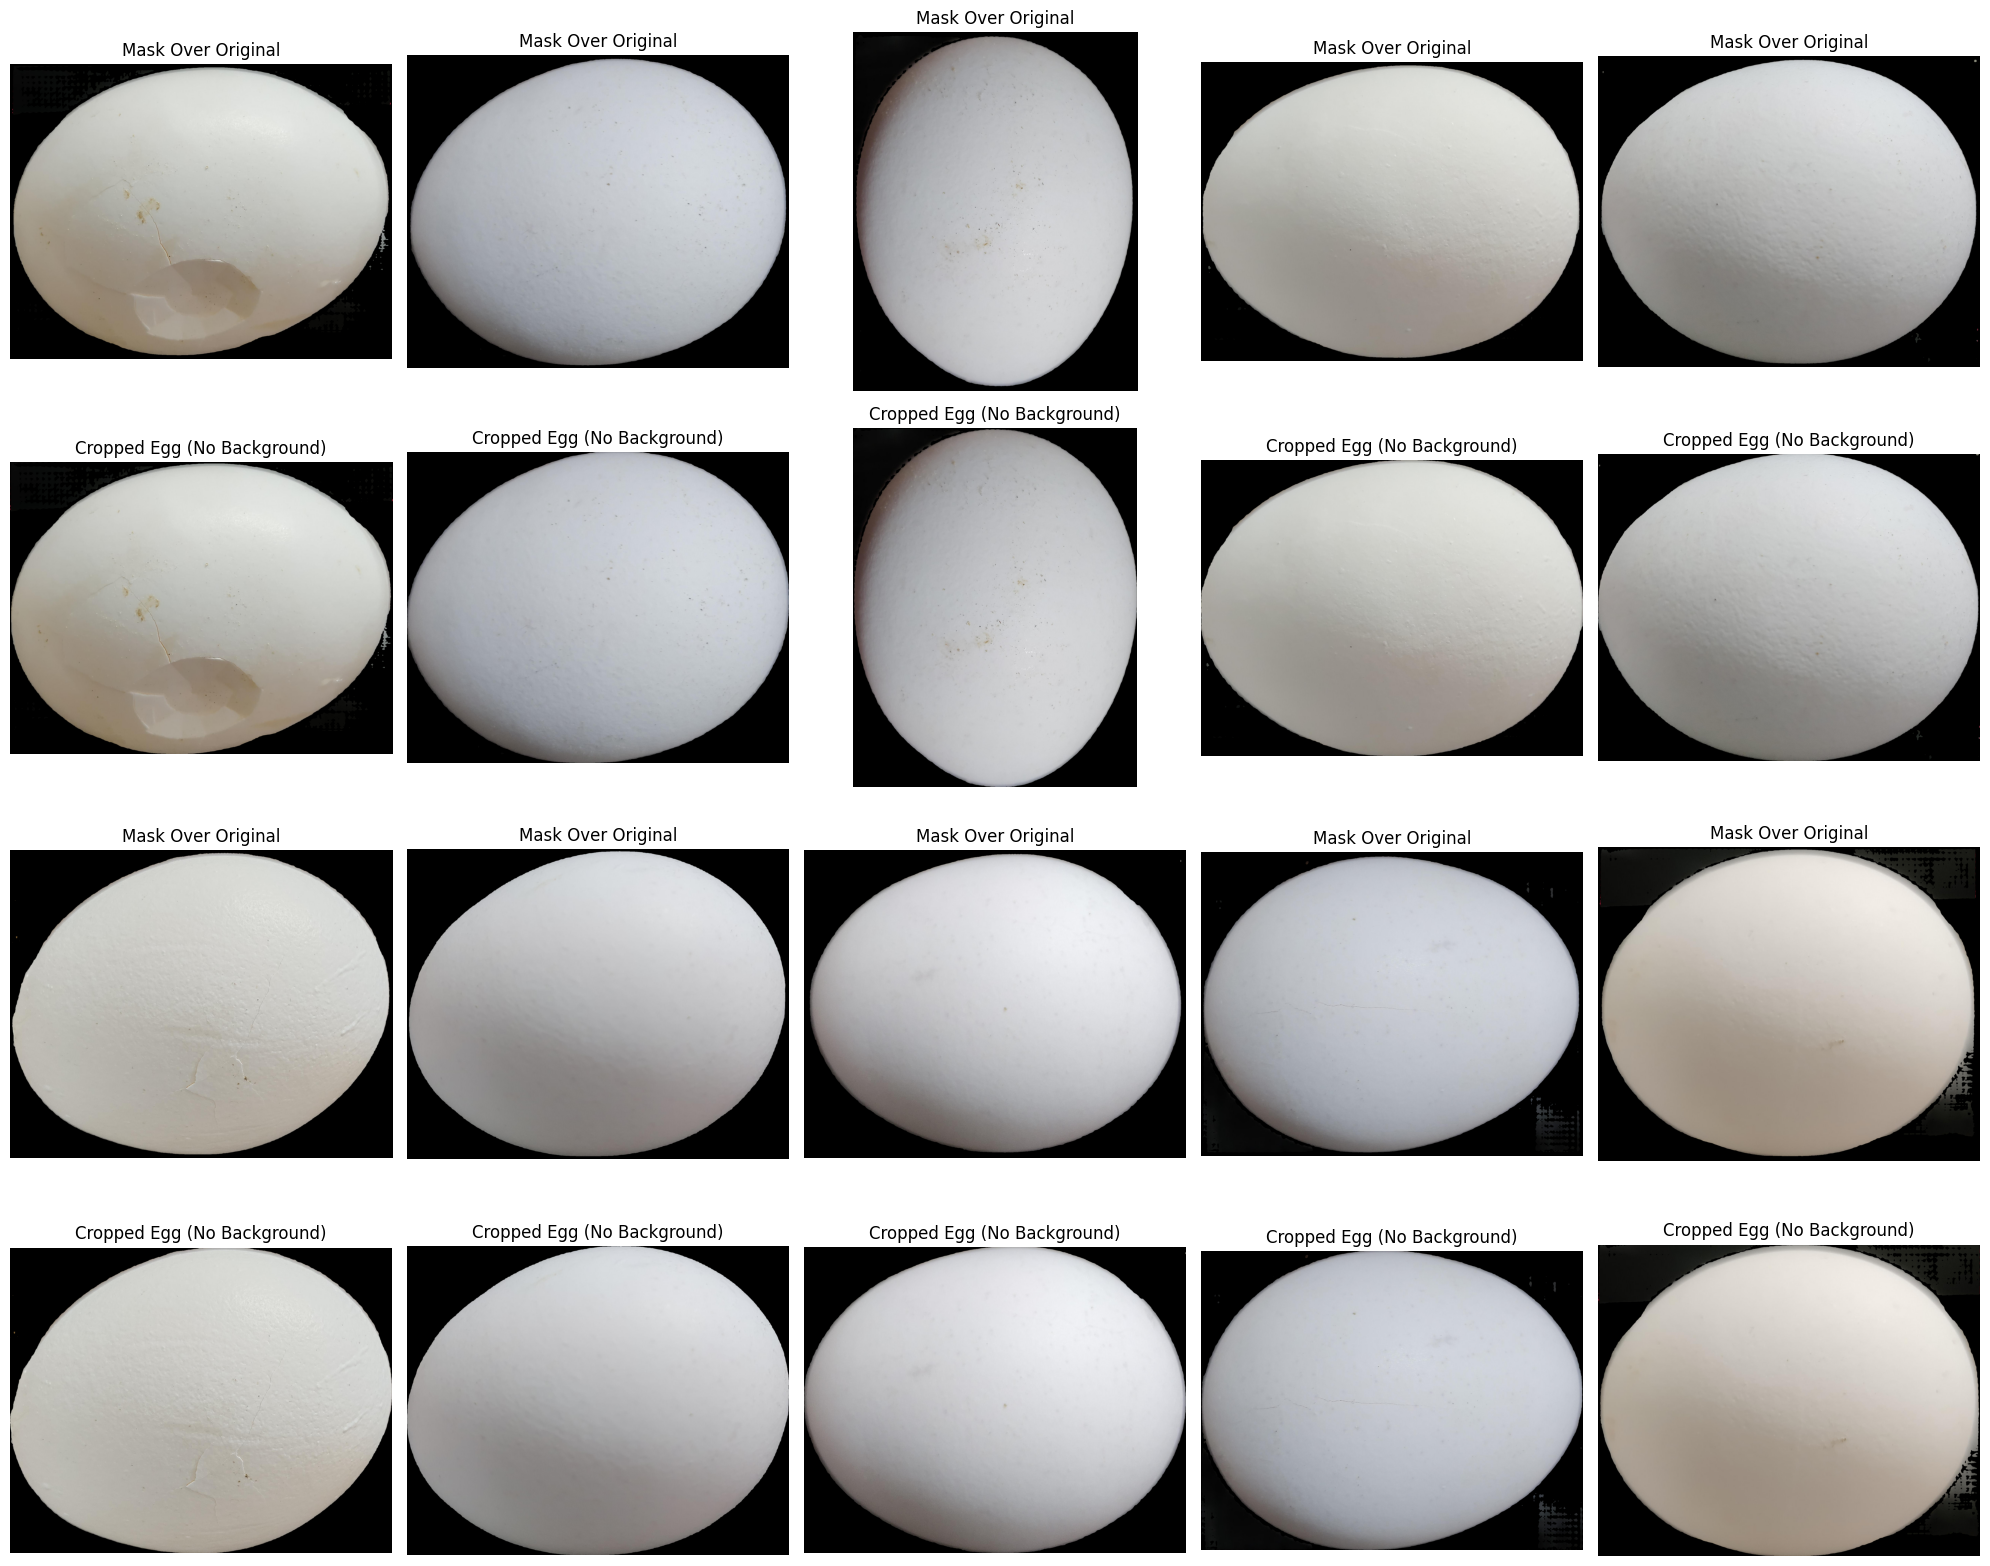

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ✅ Define parameters
SAMPLE_SIZE = 16  # Number of images to process
IMAGE_DIR = "/content/dataset5/train/images"  # Path to dataset images
OUTPUT_DIR = "/content/no_background_eggshell/"  # Output directory for cropped images
os.makedirs(OUTPUT_DIR, exist_ok=True)  # Ensure output directory exists

# ✅ Get the first image name
image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

# ✅ Store processed images
mask_over_original = []
mask_over_cropped = []

for i, image_name in enumerate(image_names):
    # ✅ Construct full image path
    image_path = os.path.join(IMAGE_DIR, image_name)
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format

    # ✅ Get fresh results from Grounded SAM (ensures masks are available)
    results = base_model.predict(image_path)

    # ✅ Ensure detections exist
    if not results or not hasattr(results, "mask"):
        print(f"⚠️ No detections or masks found for {image_name}, skipping...")
        continue

    # ✅ Process each mask (limit to 20 for visualization)
    for j, mask in enumerate(results.mask):
        mask = np.squeeze(mask)  # Remove any extra dimensions
        if mask.ndim != 2:
            print(f"⚠️ Mask dimension issue for {image_name}, skipping...")
            continue

        # ✅ Convert grayscale mask to 3-channel
        mask = np.stack([mask] * 3, axis=-1)

        # ✅ Convert image to NumPy array
        image_np = np.array(image)

        # ✅ Apply the mask to original image (black background where mask is 0)
        masked_original = np.where(mask, image_np, 0)

        # ✅ Find the bounding box of the mask
        rows = np.any(mask, axis=1)
        cols = np.any(mask, axis=0)

        if not np.any(rows) or not np.any(cols):
            print(f"⚠️ Empty mask detected for {image_name}, skipping cropping...")
            continue

        rmin, rmax = np.where(rows)[0][[0, -1]]
        cmin, cmax = np.where(cols)[0][[0, -1]]

        # ✅ Crop the image to the masked region
        cropped_image = image_np[rmin:rmax, cmin:cmax]
        cropped_mask = mask[rmin:rmax, cmin:cmax]

        # ✅ Apply the mask to cropped egg (background removed)
        masked_cropped = np.where(cropped_mask, cropped_image, 0)

        # ✅ Convert NumPy array to PIL Image and save
        cropped_image_pil = Image.fromarray(masked_cropped.astype(np.uint8))
        save_path = os.path.join(OUTPUT_DIR, f"egg_{i}_{j}.jpg")
        cropped_image_pil.save(save_path)
        print(f"✅ Saved: {save_path}")

        # ✅ Store images for visualization
        mask_over_original.append(masked_original)
        mask_over_cropped.append(masked_cropped)

        # ✅ Stop after collecting 30 images
        if len(mask_over_original) >= 30 and len(mask_over_cropped) >= 30:
            break

# ✅ Display cropped images without masks in a 4-row, 5-column grid
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# ✅ Row 1: First 5 masked over original images
for ax, img in zip(axes[0], mask_over_original[:5]):
    ax.imshow(img)
    ax.set_title("Mask Over Original")
    ax.axis("off")

# ✅ Row 2: First 5 cropped eggs without background
for ax, img in zip(axes[1], mask_over_cropped[:5]):
    ax.imshow(img)
    ax.set_title("Cropped Egg (No Background)")
    ax.axis("off")

# ✅ Row 3: Next 5 masked over original images
for ax, img in zip(axes[2], mask_over_original[5:10]):
    ax.imshow(img)
    ax.set_title("Mask Over Original")
    ax.axis("off")

# ✅ Row 4: Next 5 cropped eggs without background
for ax, img in zip(axes[3], mask_over_cropped[5:10]):
    ax.imshow(img)
    ax.set_title("Cropped Egg (No Background)")
    ax.axis("off")

plt.tight_layout()
plt.show()


# Performance Profiling of Mask Cropping and Saving

✅ Saved: /content/no_background_eggshell/eggshell_0_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_1_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_2_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_3_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_4_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_5_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_6_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_7_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_8_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_9_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_10_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_11_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_12_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_13_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_14_0.jpg
✅ Saved: /content/no_background_eggshell/eggshell_15_0.jpg
{'Device Used': 'CPU', 'Average Latency (seconds)': 2.6001, 'Avera

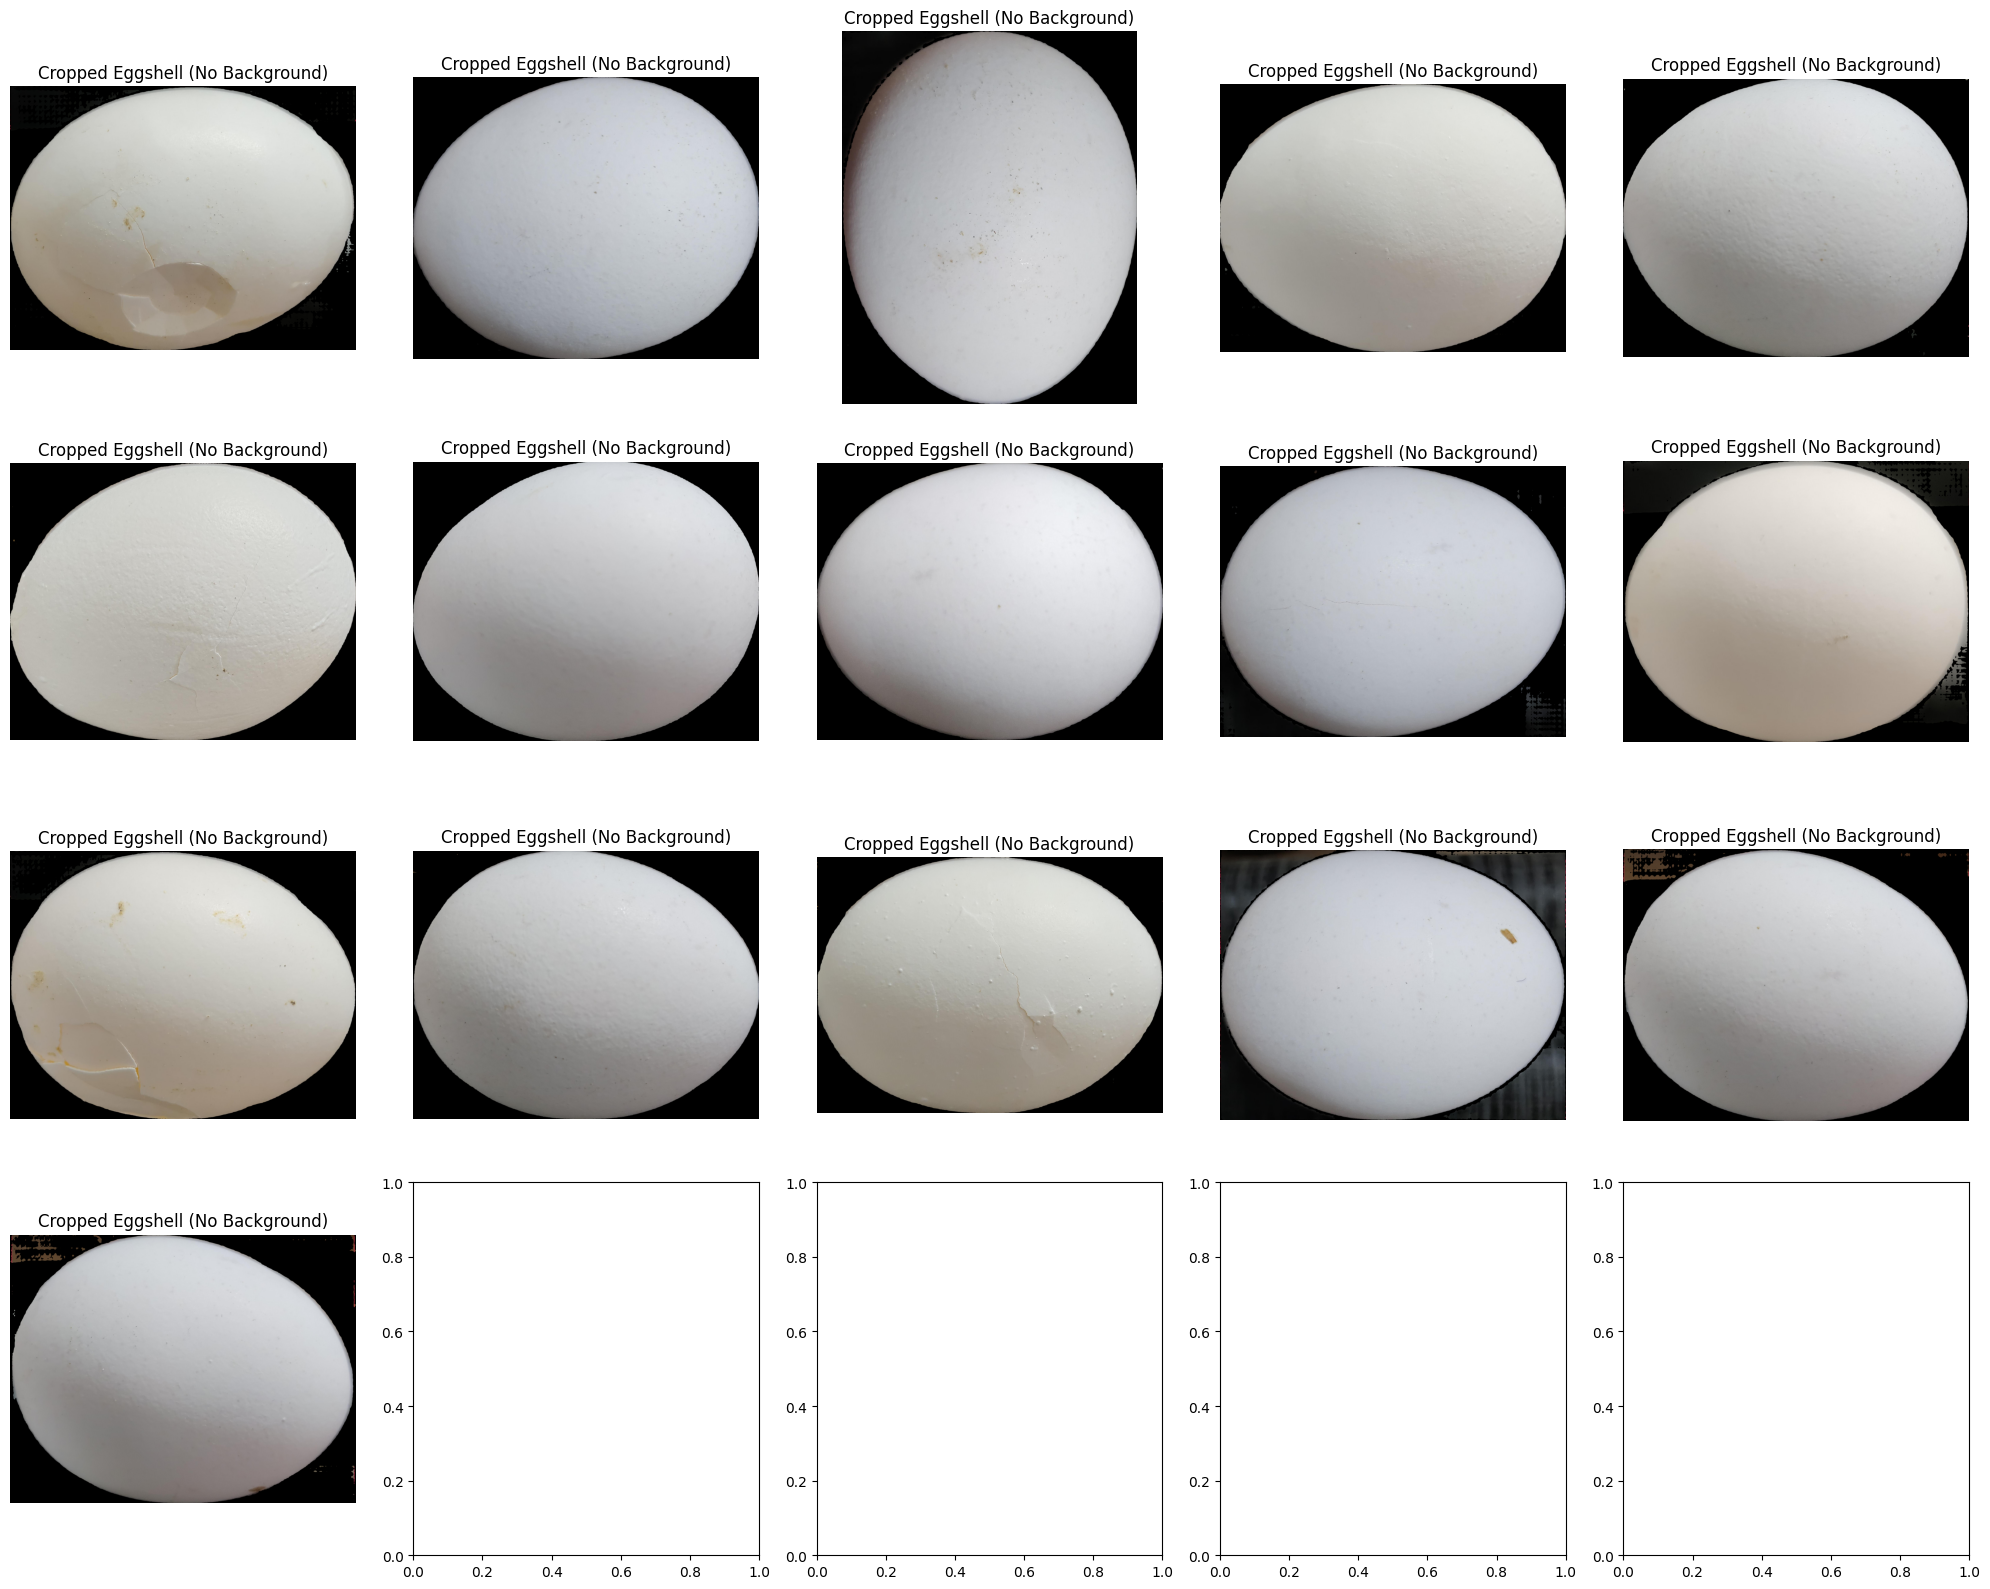

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import time
import psutil

# ✅ Define parameters
SAMPLE_SIZE = 16  # Number of images to process
IMAGE_DIR = "/content/dataset5/train/images"  # Path to dataset images
OUTPUT_DIR = "/content/no_background_eggshell/"  # Output directory for cropped images
os.makedirs(OUTPUT_DIR, exist_ok=True)  # Ensure output directory exists

# ✅ Measure CPU and memory usage before execution
cpu_usage_before = psutil.cpu_percent(interval=1)
memory_usage_before = psutil.virtual_memory().used / (1024 ** 2)  # Convert to MB

# ✅ Start execution time measurement
start_time = time.time()

# ✅ Get the first image name
image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

# ✅ Store processed images
processed_images = []

for i, image_name in enumerate(image_names):
    # ✅ Construct full image path
    image_path = os.path.join(IMAGE_DIR, image_name)
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    image_np = np.array(image)  # Convert to NumPy array

    # ✅ Get fresh results from Grounded SAM (ensures masks are available)
    results = base_model.predict(image_path)

    # ✅ Ensure detections exist
    if not results or not hasattr(results, "mask") or results.mask is None:
        print(f"⚠️ No detections or masks found for {image_name}, skipping...")
        continue

    # ✅ Process each mask
    for j, mask in enumerate(results.mask):
        mask = np.squeeze(mask)  # Remove extra dimensions
        if mask.ndim != 2:
            print(f"⚠️ Mask dimension issue for {image_name}, skipping...")
            continue

        # ✅ Convert grayscale mask to 3-channel
        mask = np.stack([mask] * 3, axis=-1)

        # ✅ Apply the mask to original image (black background where mask is 0)
        masked_egg = np.where(mask, image_np, 0)

        # ✅ Find the bounding box of the mask
        rows = np.any(mask, axis=1)
        cols = np.any(mask, axis=0)

        if not np.any(rows) or not np.any(cols):
            print(f"⚠️ Empty mask detected for {image_name}, skipping cropping...")
            continue

        rmin, rmax = np.where(rows)[0][[0, -1]]
        cmin, cmax = np.where(cols)[0][[0, -1]]

        # ✅ Crop the image to the masked region (eggshell only)
        cropped_image = masked_egg[rmin:rmax, cmin:cmax]

        # ✅ Convert NumPy array to PIL Image and save
        cropped_image_pil = Image.fromarray(cropped_image.astype(np.uint8))
        save_path = os.path.join(OUTPUT_DIR, f"eggshell_{i}_{j}.jpg")
        cropped_image_pil.save(save_path)
        print(f"✅ Saved: {save_path}")

        # ✅ Store for visualization
        processed_images.append(cropped_image)

        # ✅ Stop after processing 90 images
        if len(processed_images) >= 90:
            break

# ✅ End execution time measurement
end_time = time.time()

# ✅ Measure CPU and memory usage after execution
cpu_usage_after = psutil.cpu_percent(interval=1)
memory_usage_after = psutil.virtual_memory().used / (1024 ** 2)  # Convert to MB

# ✅ Compute performance metrics
total_time = end_time - start_time
average_latency = total_time / SAMPLE_SIZE if SAMPLE_SIZE else None
fps = SAMPLE_SIZE / total_time if total_time > 0 else None
average_cpu_usage = (cpu_usage_before + cpu_usage_after) / 2
average_memory_usage = memory_usage_after - memory_usage_before

# ✅ Display performance results
performance_results = {
    "Device Used": "CPU",
    "Average Latency (seconds)": round(average_latency, 4) if average_latency else "N/A",
    "Average FPS": round(fps, 2) if fps else "N/A",
    "Average CPU Usage (%)": round(average_cpu_usage, 2),
    "Average Memory Usage (MB)": round(average_memory_usage, 2),
}

print(performance_results)

# ✅ Display cropped eggshell images (4-row, 5-column grid)
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for ax, img in zip(axes.flatten(), processed_images[:20]):
    ax.imshow(img)
    ax.set_title("Cropped Eggshell (No Background)")
    ax.axis("off")

plt.tight_layout()
plt.show()
